In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend("qasm_simulator")

# Oracles:

## $U_{A}$ : Constant 1

In [6]:
u_A_inner = QuantumCircuit(3, name='U_A')
u_A_inner.x(2)
u_A = u_A_inner.to_instruction()
u_A_inner.draw('mpl')

$U_{A}$ is defined by:
\begin{align}
|000\rangle & \mapsto |100\rangle \\
|001\rangle & \mapsto |101\rangle \\
|010\rangle & \mapsto |110\rangle \\
|011\rangle & \mapsto |111\rangle \\
|100\rangle & \mapsto |000\rangle \\
|101\rangle & \mapsto |001\rangle \\
|110\rangle & \mapsto |010\rangle \\
|111\rangle & \mapsto |011\rangle \\
\end{align}

Verification:
\begin{align}
X\otimes I\otimes I|000\rangle & = |110\rangle \\
X\otimes I\otimes I|001\rangle & = |111\rangle \\
X\otimes I\otimes I|010\rangle & = |100\rangle \\
X\otimes I\otimes I|011\rangle & = |101\rangle \\
X\otimes I\otimes I|100\rangle & = |010\rangle \\
X\otimes I\otimes I|101\rangle & = |011\rangle \\
X\otimes I\otimes I|110\rangle & = |000\rangle \\
X\otimes I\otimes I|111\rangle & = |001\rangle \\
\end{align}

# $U_{B}$ : Constant 0

In [28]:
u_B_inner = QuantumCircuit(3, name='U_B')
u_B = u_B_inner.to_instruction()
u_B_inner.draw('mpl')

$U_{B}$ is defined by:
\begin{align}
|000\rangle & \mapsto |000\rangle \\
|001\rangle & \mapsto |001\rangle \\
|010\rangle & \mapsto |010\rangle \\
|011\rangle & \mapsto |011\rangle \\
|100\rangle & \mapsto |100\rangle \\
|101\rangle & \mapsto |101\rangle \\
|110\rangle & \mapsto |110\rangle \\
|111\rangle & \mapsto |111\rangle \\
\end{align}

Verification:
\begin{align}
|000\rangle & = |010\rangle \\
|001\rangle & = |011\rangle \\
|010\rangle & = |000\rangle \\
|011\rangle & = |001\rangle \\
|100\rangle & = |110\rangle \\
|101\rangle & = |111\rangle \\
|110\rangle & = |100\rangle \\
|111\rangle & = |101\rangle \\
\end{align}


# $U_{C}$ : Starts with 1

In [29]:
u_c_inner = QuantumCircuit(3,name='U_C')
u_c_inner.cnot(2,0)
u_c = u_c_inner.to_instruction()
u_c_inner.draw('mpl')

$U_{C}$ is defined by:
\begin{align}
|000\rangle & \mapsto |000\rangle \\
|001\rangle & \mapsto |101\rangle \\
|010\rangle & \mapsto |010\rangle \\
|011\rangle & \mapsto |111\rangle \\
|100\rangle & \mapsto |100\rangle \\
|101\rangle & \mapsto |001\rangle \\
|110\rangle & \mapsto |110\rangle \\
|111\rangle & \mapsto |011\rangle \\
\end{align}

Verification:
\begin{align}
CNOT_{2,0}|000\rangle & = |000\rangle \\
CNOT_{2,0}|001\rangle & = |101\rangle \\
CNOT_{2,0}|010\rangle & = |010\rangle \\
CNOT_{2,0}|011\rangle & = |111\rangle \\
CNOT_{2,0}|100\rangle & = |100\rangle \\
CNOT_{2,0}|101\rangle & = |001\rangle \\
CNOT_{2,0}|110\rangle & = |110\rangle \\
CNOT_{2,0}|111\rangle & = |011\rangle \\
\end{align}


# $U_{D}$ : Starts with 0 

In [38]:
u_d_inner = QuantumCircuit(3,name="U_D")
u_d_inner.x(2)
u_d_inner.cnot(2,0)
u_d_inner.x(2)
u_d = u_d_inner.to_instruction()
u_d_inner.draw('mpl')

$U_{D}$ is defined by:
\begin{align}
|000\rangle & \mapsto |100\rangle \\
|001\rangle & \mapsto |001\rangle \\
|010\rangle & \mapsto |110\rangle \\
|011\rangle & \mapsto |011\rangle \\
|100\rangle & \mapsto |000\rangle \\
|101\rangle & \mapsto |101\rangle \\
|110\rangle & \mapsto |010\rangle \\
|111\rangle & \mapsto |111\rangle \\
\end{align}

Verification:
\begin{align}
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|000\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|001\rangle =
(I \otimes I \otimes X)|101\rangle =
|100\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|001\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|000\rangle =
(I \otimes I \otimes X)|000\rangle =
|001\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|010\rangle & =
(I \otimes I \otimes X) \circ CNOT_{2,0}|011\rangle =
(I \otimes I \otimes X)|111\rangle =
|110\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|011\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|010\rangle =
(I \otimes I \otimes X)|010\rangle =
|011\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|100\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|101\rangle =
(I \otimes I \otimes X)|001\rangle =
|000\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|101\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|100\rangle =
(I \otimes I \otimes X)|100\rangle =
|101\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|110\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|111\rangle =
(I \otimes I \otimes X)|011\rangle =
|010\rangle \\
(I \otimes I \otimes X) \circ CNOT_{2,0} \circ (I \otimes I \otimes X)|111\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{2,0}|110\rangle =
(I \otimes I \otimes X)|110\rangle =
|111\rangle \\
\end{align}


# The Deutsch algorithm:

In [43]:
c = QuantumCircuit(3,1)
c.x(2)
c.barrier();
c.h(0);
c.h(1);
c.h(2);
#c.append(u_A, [0, 1, 2]);
#c.append(u_B, [0, 1, 2]);
c.append(u_c, [0, 1, 2]);
#c.append(u_d, [0, 1, 2]);
c.h(0);
c.h(1);
c.barrier();
c.measure(0,0);
c.draw("mpl")

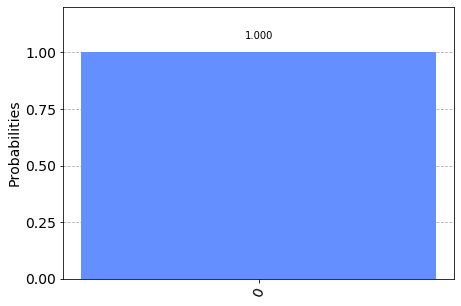

In [44]:
job = execute(c, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)